In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:

features_lst = ['sepal_length','sepal_width','petal_length','petal_width','species']
variants_name = {0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}
variants_lst = []
for i in range(load_iris().target.shape[0]):
    variants_lst.append(variants_name[load_iris().target[i]])
data = {}
for i in range(len(features_lst)):
    if i != 4:
        data[features_lst[i]] = load_iris().data[:,i]
    else:
        data[features_lst[i]] = variants_lst
df=pd.DataFrame(data)
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.groupby('species').size().reset_index().rename(columns = {0:"count"})

,species,count
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


([<matplotlib.patches.Wedge at 0x1e57b9e09d0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Iris-setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Iris-versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'Iris-virginica')])

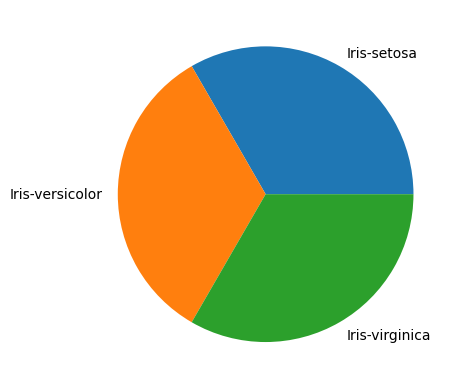

In [7]:
plt.pie(np.array(df.groupby('species').size().reset_index().rename(columns = {0:"count"})['count']), labels=variants_name.values())

In [8]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.428,1.462,0.246
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


# Boxplot and Whiskers


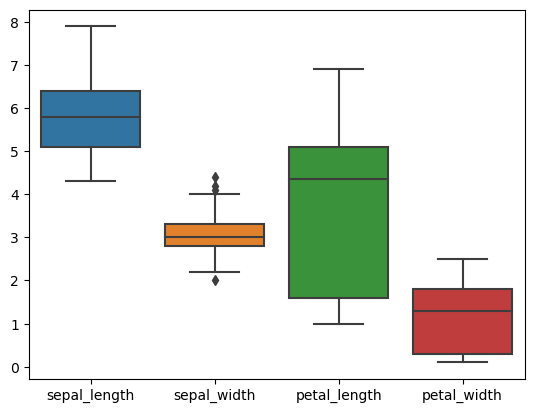

In [9]:
sns.boxplot(data=df,fliersize=5)
plt.show()

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

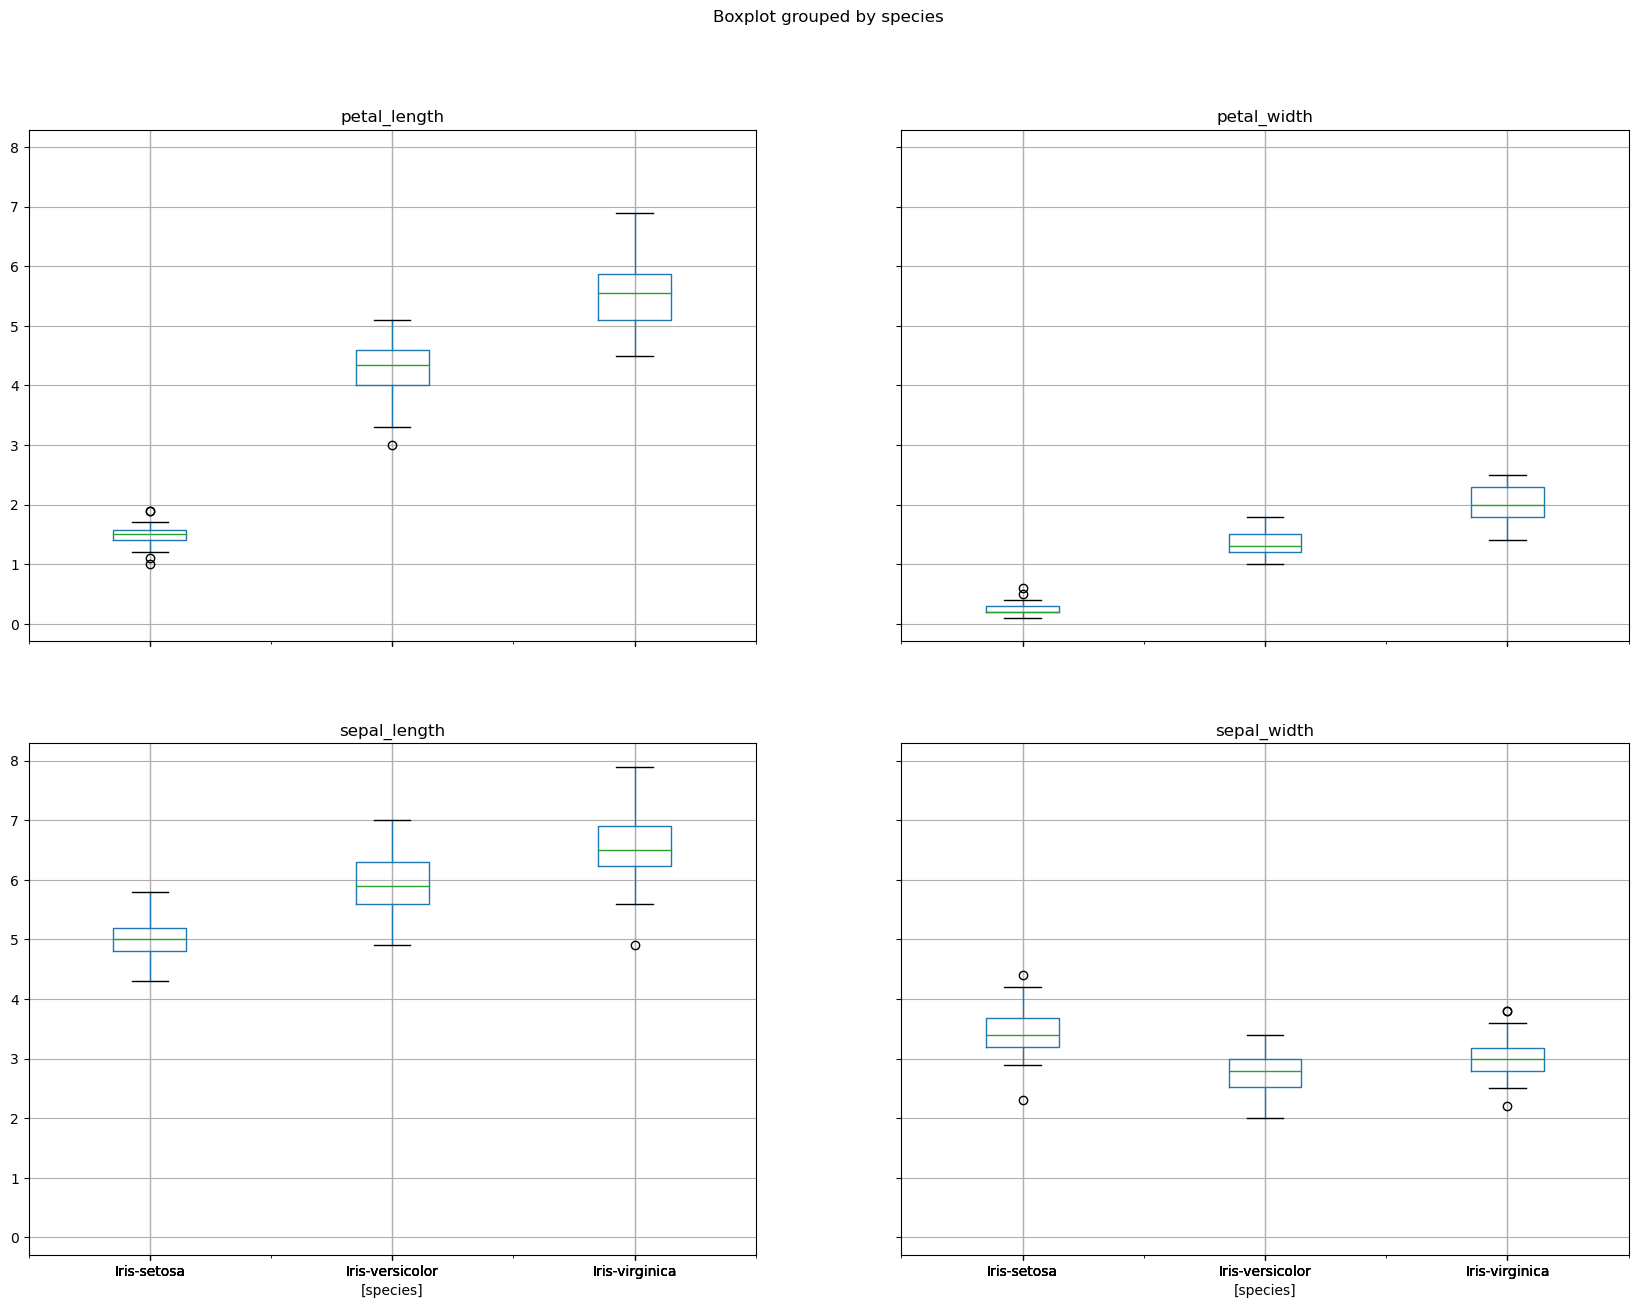

In [10]:
df.boxplot(by="species",figsize=(20,15))

# Violin plot

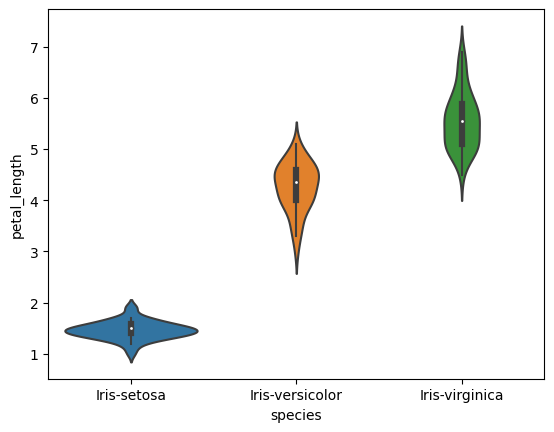

In [11]:
sns.violinplot(x="species",y="petal_length",data=df)#inside this violin plot contains box plots
plt.show()

# Histograms

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

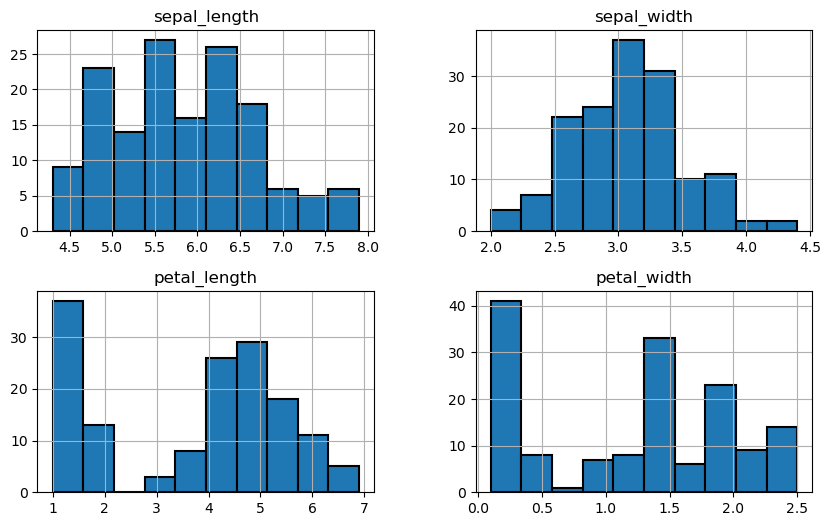

In [12]:
df.hist(edgecolor = 'black', linewidth=1.5, figsize=(10,6))

# Pairplot

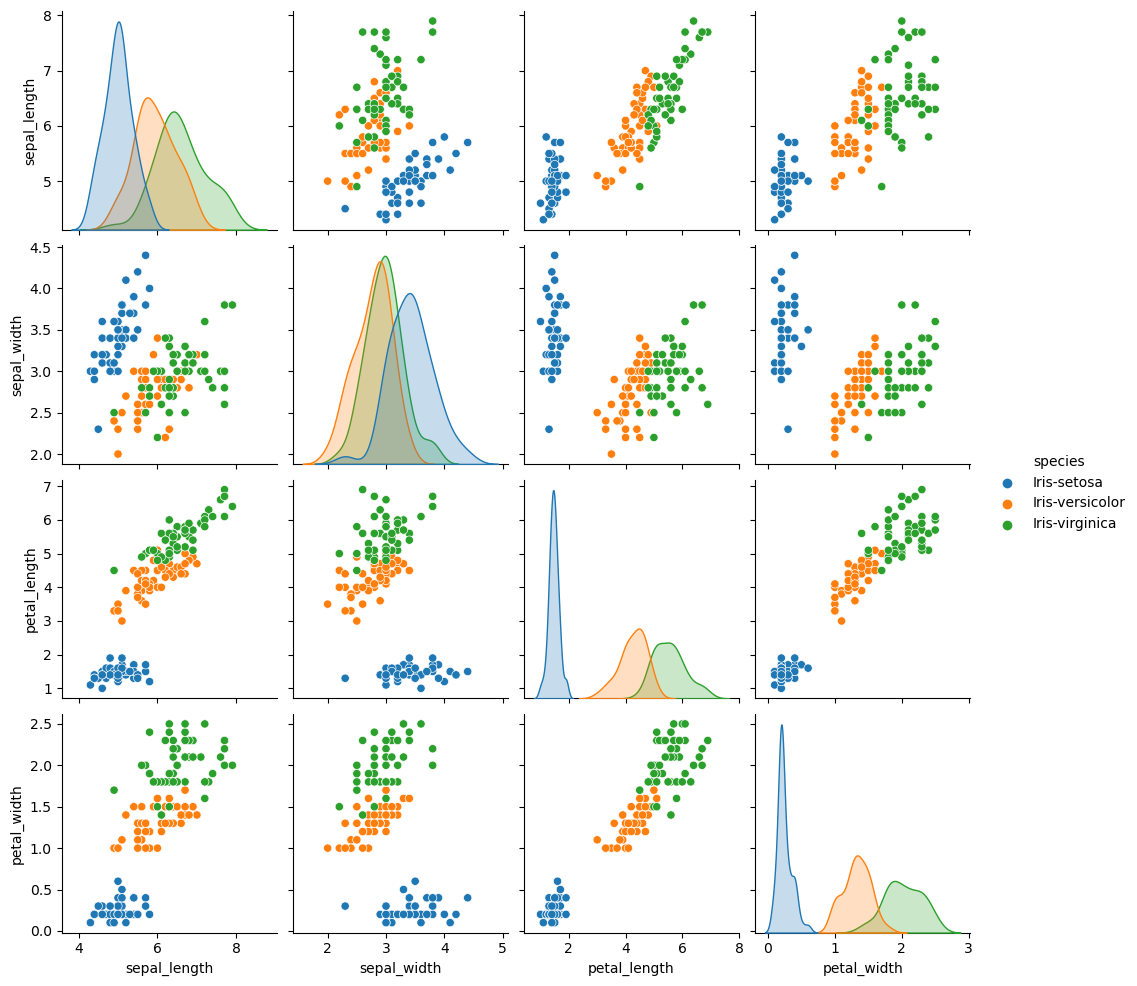

In [13]:
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(df, hue="species")